Back to [README.md](./README.md)

Back to the [previous notebook](./09-offsets-and-more-insights.ipynb)

--------------------

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from setup import Col, Palette, Region, Sex

In [2]:
# Read in the final version of the data frame from the respective .csv file
df = pd.read_csv('./data/final-df.csv')

--------------------

# Outlook

In this notebook we will only mention some further observations and
ideas, but we will not look any further into them.

We will begin by going back to where we arrived at our first prediction
for the `charges` per given `age`.  We looked at the following graphic and suspected
to need to deal with three different offsets.

![](images/offsets-age-relation-plain.png)

We can apply our insight on the `smoker` and the `bmi` influence to get a bit
of a more detailed look into the underlying structure:

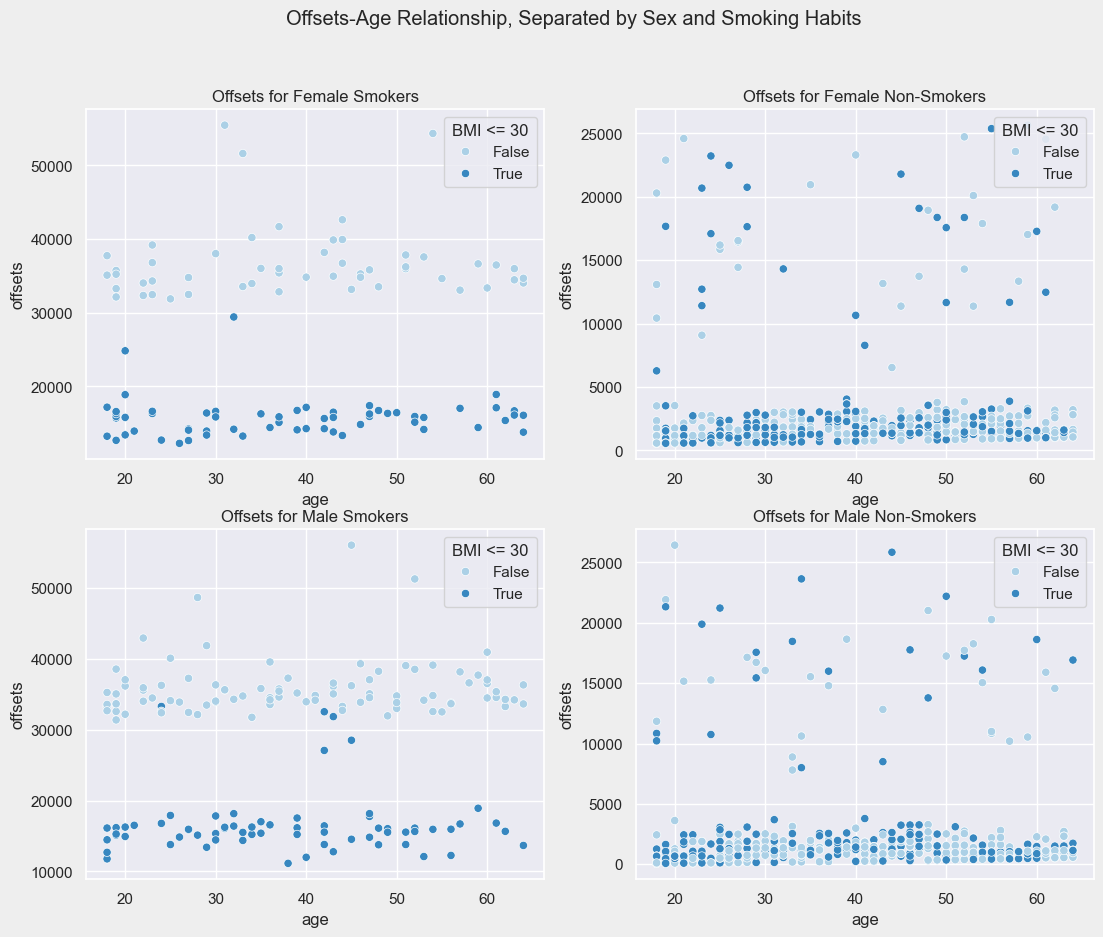

In [5]:
# Plot the two datasets
fig = plt.figure(figsize=(13, 10))
plt.subplot(221)
sns.scatterplot(data=df[(df.sex == Sex.f) & df.smoker], x=Col.age, y=Col.offsets, hue=Col.bmi30, palette=Palette.bl)
plt.gca().set_title('Offsets for Female Smokers')
plt.subplot(222)
sns.scatterplot(data=df[(df.sex == Sex.f) & ~df.smoker], x=Col.age, y=Col.offsets, hue=Col.bmi30, palette=Palette.bl)
plt.gca().set_title('Offsets for Female Non-Smokers')
plt.subplot(223)
sns.scatterplot(data=df[(df.sex == Sex.m) & df.smoker], x=Col.age, y=Col.offsets, hue=Col.bmi30, palette=Palette.bl)
plt.gca().set_title('Offsets for Male Smokers')
plt.subplot(224)
sns.scatterplot(data=df[(df.sex == Sex.m) & ~df.smoker], x=Col.age, y=Col.offsets, hue=Col.bmi30, palette=Palette.bl)
plt.gca().set_title('Offsets for Male Non-Smokers')
fig.suptitle('Offsets-Age Relationship, Separated by Sex and Smoking Habits')
plt.show()

By comparing the graphics, we can see that we, indeed, deal with more than three distinct levels
(males and females will have their own elevated offset levels, and we still ignore potential
regional influences) plus some "noise"
created by the non-smokers that happens to overlap with the smoker's lower `offsets`
levels.  A deeper look into this might reveal some adjustments for our `charges` prediction,
but we will not get into that in this repo as it does not actually contribute to understanding
the "nature" of the original dataset.  We made some comments when we noticed that there will be
some influence, and we will leave it at that for now.

Next, we want to see if we can solidify our suspicion that the number of children increases
the charges.  We will do so by focusing on the data subset that gave raise to this
idea: the smokers from which the `age` influence has been removed from the `charges`
(= `offsets` column). 

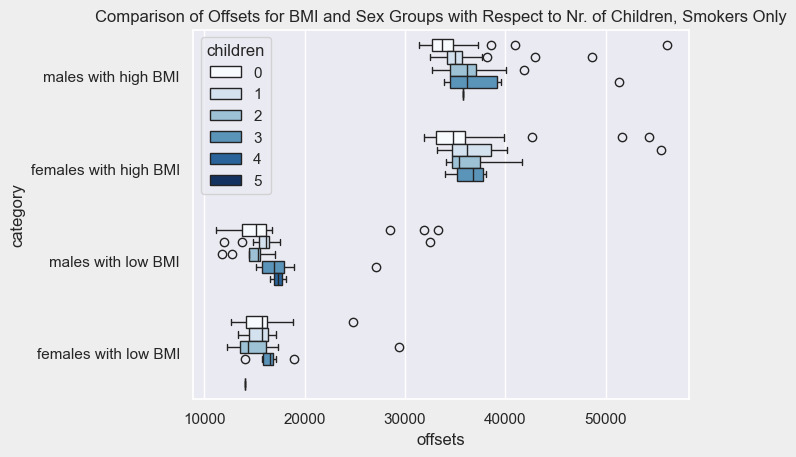

In [6]:
combined_smoker_df = df[df.smoker][[Col.offsets, Col.sex, Col.bmi30, Col.children]].copy()
combined_smoker_df['category'] = combined_smoker_df.apply(\
    lambda row:\
        f'{row[Col.sex]}s with low BMI'\
        if row[Col.bmi30]\
        else f'{row[Col.sex]}s with high BMI',\
    axis=1)
sns.boxplot(data=combined_smoker_df.sort_values(Col.offsets, ascending=False), y='category', x=Col.offsets, hue=Col.children, palette=Palette.bl)
plt.title('Comparison of Offsets for BMI and Sex Groups with Respect to Nr. of Children, Smokers Only')
plt.show()

At this point, there is no definitive answer to be found.  As for the statistical
relevance, one could arrive at the impression that there is no such correlation to
begin with, looking just at the image above.

But this is due to the fact that the BMI still yields a much more significant
effect on the data.  If we remove that as well, we can see many, much more detailed
underlying structures coming to light:

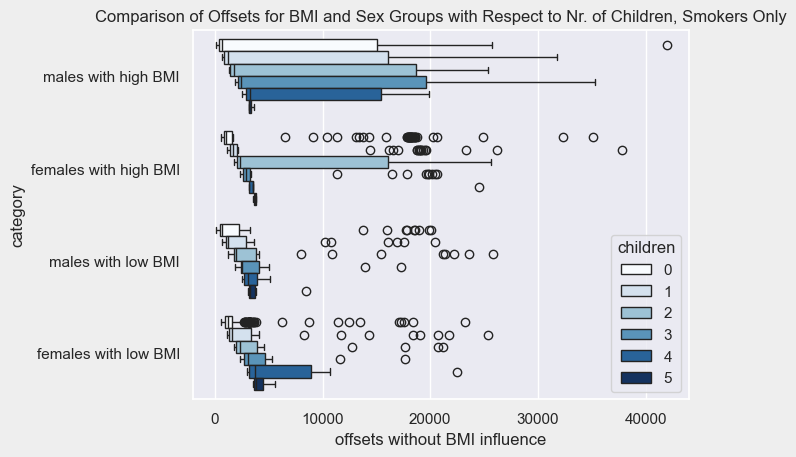

In [8]:
bmi_col = 'offsets without BMI influence'
combined_df = df[[bmi_col, Col.sex, Col.bmi30, Col.children]].copy()
combined_df['category'] = combined_df.apply(\
    lambda row:\
        f'{row[Col.sex]}s with low BMI'\
        if row[Col.bmi30]\
        else f'{row[Col.sex]}s with high BMI',\
    axis=1)
sns.boxplot(data=combined_df.sort_values(bmi_col, ascending=False), y='category', x=bmi_col, hue=Col.children, palette=Palette.bl)
plt.title('Comparison of Offsets for BMI and Sex Groups with Respect to Nr. of Children, Smokers Only')
plt.show()

In fact, having seen this now for the influence of children on the charges,
let us finish with a mega-plot in which *all numerical influences* on the charges
have been *removed*, and *only* the *categorical* ones remain.  And let us compare
each category with each, while we are at it!

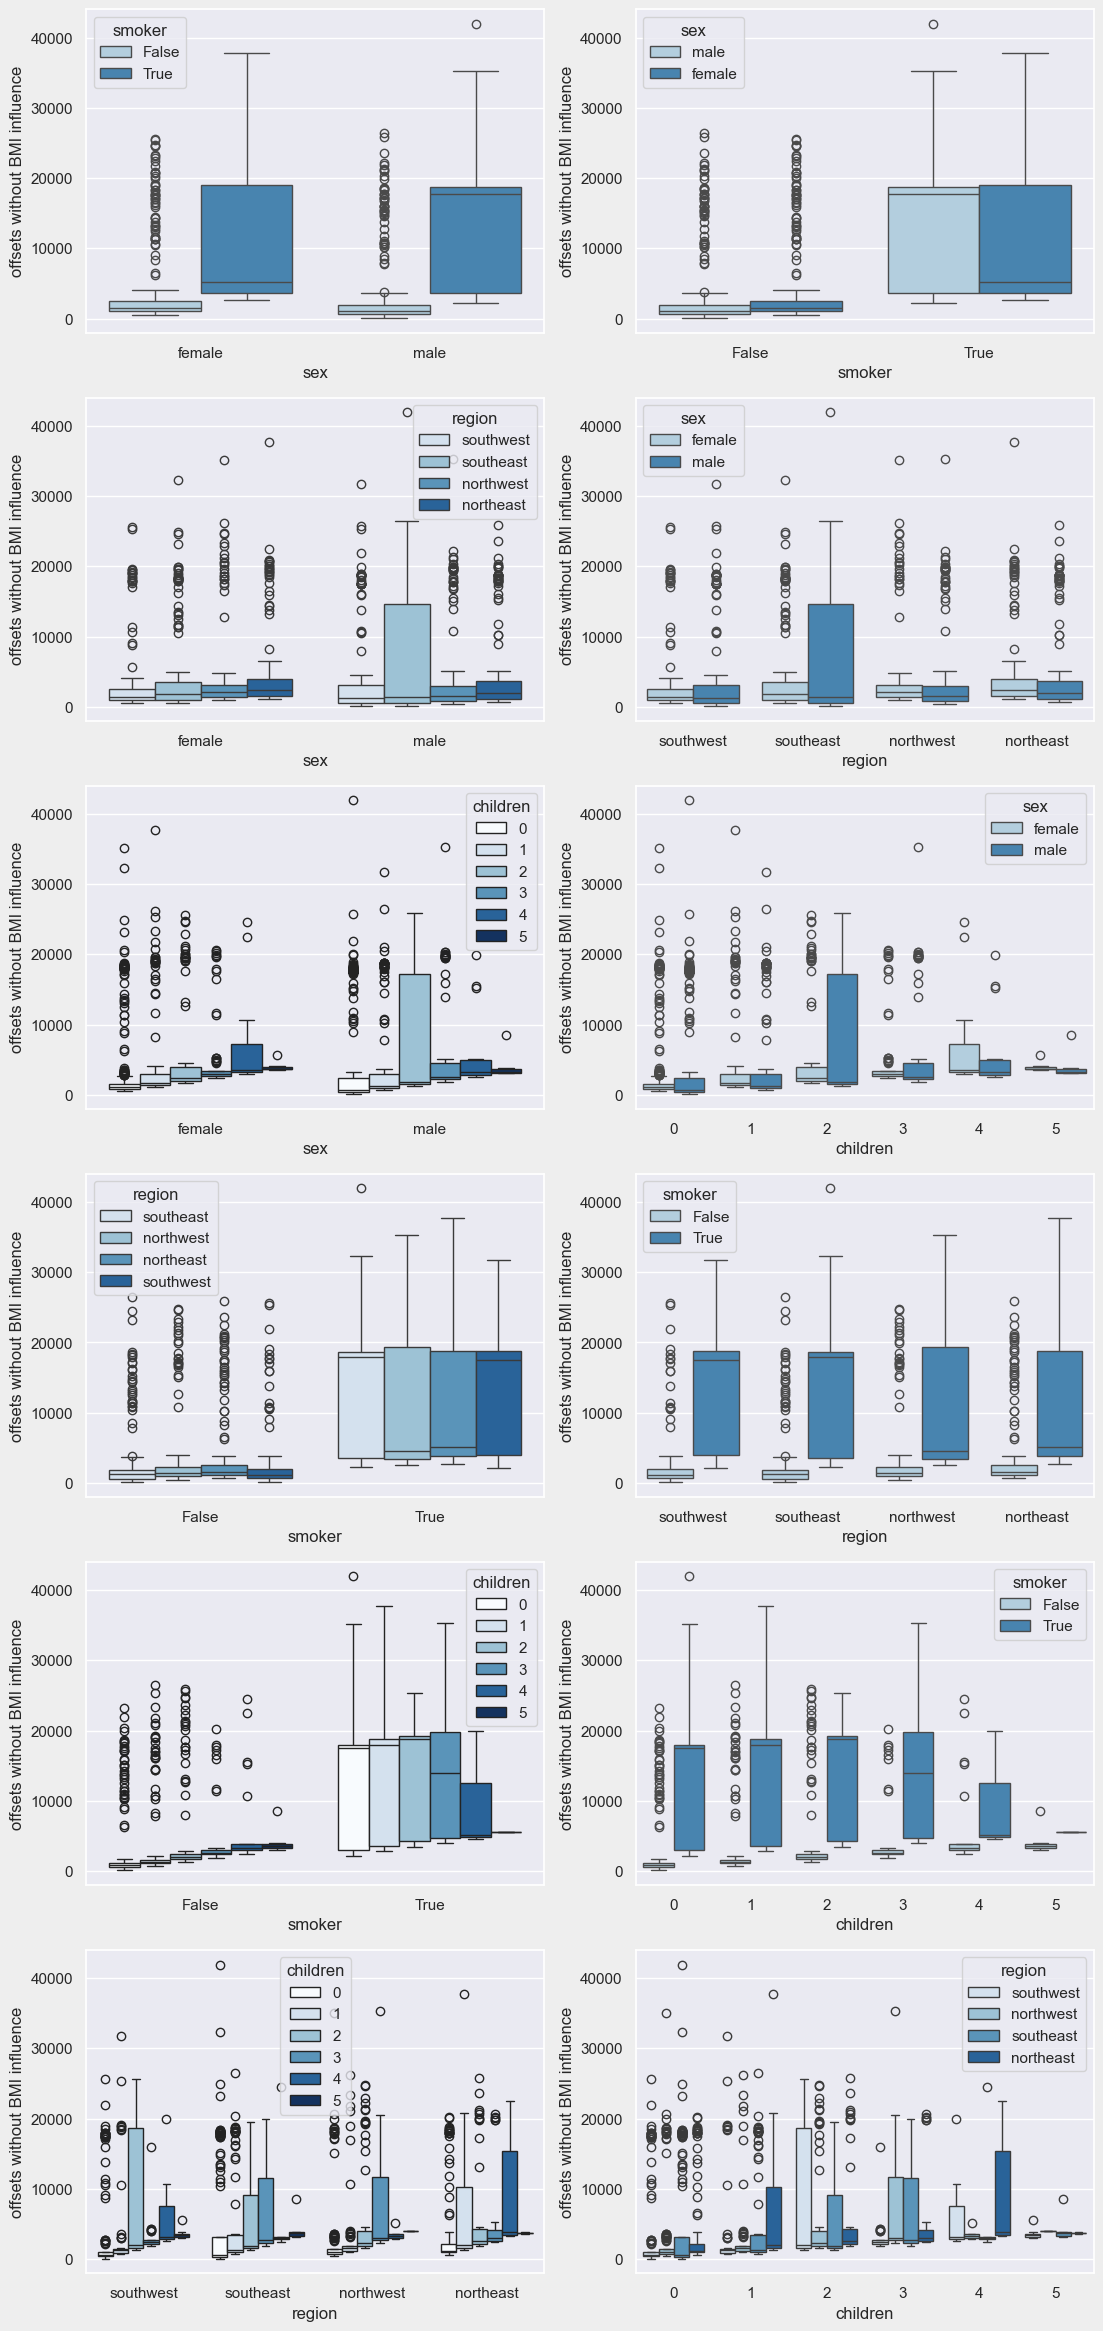

In [9]:
fig = plt.figure(figsize=(13, 6*4.9))
plt.subplot(621);      sns.boxplot(data=df, x=Col.sex, hue=Col.smoker, y=bmi_col, palette=Palette.bl)
plt.subplot(622);      sns.boxplot(data=df, x=Col.smoker, hue=Col.sex, y=bmi_col, palette=Palette.bl)
plt.subplot(623);      sns.boxplot(data=df, x=Col.sex, hue=Col.region, y=bmi_col, palette=Palette.bl)
plt.subplot(624);      sns.boxplot(data=df, x=Col.region, hue=Col.sex, y=bmi_col, palette=Palette.bl)
plt.subplot(625);      sns.boxplot(data=df, x=Col.sex, hue=Col.children, y=bmi_col, palette=Palette.bl)
plt.subplot(626);      sns.boxplot(data=df, x=Col.children, hue=Col.sex, y=bmi_col, palette=Palette.bl)
plt.subplot(627);      sns.boxplot(data=df, x=Col.smoker, hue=Col.region, y=bmi_col, palette=Palette.bl)
plt.subplot(628);      sns.boxplot(data=df, x=Col.region, hue=Col.smoker, y=bmi_col, palette=Palette.bl)
plt.subplot(629);      sns.boxplot(data=df, x=Col.smoker, hue=Col.children, y=bmi_col, palette=Palette.bl)
plt.subplot(6, 2, 10); sns.boxplot(data=df, x=Col.children, hue=Col.smoker, y=bmi_col, palette=Palette.bl)
plt.subplot(6, 2, 11); sns.boxplot(data=df, x=Col.region, hue=Col.children, y=bmi_col, palette=Palette.bl)
plt.subplot(6, 2, 12); sns.boxplot(data=df, x=Col.children, hue=Col.region, y=bmi_col, palette=Palette.bl)
plt.show()

There shall be no further comments or analysis on that one.  The reader
is encouraged to interpret the graphs however they like.

The objectives of this exercise have been met, and a deeper understanding
of the dataset has been developed.  And yet, there are many, many facts
undiscovered, many questions unasked.  And many people have analyzed the
very same data, and came to various different conclusions.

This was just a small, a first attempt of an upcoming data scientist to
try their hands on an unknown dataset without guidance and with just a
limited skill set on their path towards understanding, knowledge and
insight.

--------------------

Back to the [README](./README.md)